# Laden der Daten

In [144]:
import numpy as np

In [145]:
# load vine dfset from scikit-learn


import pandas as pd
# import train test split
from sklearn.model_selection import train_test_split
import torch

df=pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [148]:
#split engine column and take the first value
df['engine']=df['engine'].str.split(' ').str[0]
#split mileage column and take the first value
df['mileage']=df['mileage'].str.split(' ').str[0]
#split max_power column and take the first value
df['max_power']=df['max_power'].str.split(' ').str[0]
#split name into brand and model
df['brand']=df['name'].str.split(' ').str[0]
#drop name and torque column
df=df.drop(['name','torque'],axis=1)

In [149]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,Maruti


In [150]:
#convert milage, engine and max_power to float if possible
df['mileage']=pd.to_numeric(df['mileage'], errors="coerce")
df['engine']=pd.to_numeric(df['engine'], errors="coerce")
df['max_power']=pd.to_numeric(df['max_power'], errors="coerce")

#classifying the non-numeric columns
df['fuel']=df['fuel'].astype('category')
df['seller_type']=df['seller_type'].astype('category')
df['transmission']=df['transmission'].astype('category')
df['owner']=df['owner'].astype('category')
df['brand']=df['brand'].astype('category')

#convert the non-numeric columns to numeric
df['fuel']=df['fuel'].cat.codes
df['seller_type']=df['seller_type'].cat.codes
df['transmission']=df['transmission'].cat.codes
df['owner']=df['owner'].cat.codes
df['brand']=df['brand'].cat.codes

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,27
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20


In [151]:
#fill missing values with mean
df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['engine']=df['engine'].fillna(df['engine'].mean())
df['max_power']=df['max_power'].fillna(df['max_power'].mean())

#fill missing values with mode
df['seats']=df['seats'].fillna(df['seats'].mode()[0])


# Scaling der Daten

In [152]:
#set log of selling_price as target
y_data=np.log(df['selling_price'])
#drop sales_price column
x_data=df.drop(['selling_price'],axis=1)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)
x_data = pd.DataFrame(x_data)
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258,0.272216
1,0.048464,0.887411,-0.889115,0.277607,0.385158,0.970600,0.432289,0.079227,0.339607,-0.427258,1.222516
2,-1.929775,1.241098,1.106392,0.277607,0.385158,2.607839,-0.431678,0.077215,-0.382499,-0.427258,-1.085356
3,-0.940656,1.011202,-0.889115,0.277607,0.385158,-0.666639,0.899435,-0.126009,-0.042951,-0.427258,-0.949599
4,-1.682495,0.887411,1.106392,0.277607,0.385158,-0.666639,-0.833524,-0.323198,-0.093883,-0.427258,0.272216


# Split der daten und Konvertierung in Tensoren

In [154]:
#split data into train and test with y as price
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [155]:
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test= torch.tensor(y_test.values, dtype=torch.float)

# Modell bauen

In [159]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

    # Konstruktor
    def __init__(self,input_size=11,hidden_size=(10,20,10),output_size=1):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        # Definition der Schichten
        #definiert die Anzahl der Neuronen in den Schichten
        self.fc1 = torch.nn.Linear(input_size, hidden_size[0])
        self.fc2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        # Batch Normalization
        # 70, 120, 30 sind die Anzahl der Neuronen in den Schichten
        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])

    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

# Training

In [160]:
def get_batch(x, y, batch_size):
    # z.B. range(0, 10, 3) --> 0, 3, 6, 9
    # range(start, stop, step)
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]



Epoch 00134: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00145: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00156: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00167: reducing learning rate of group 0 to 1.0000e-08.


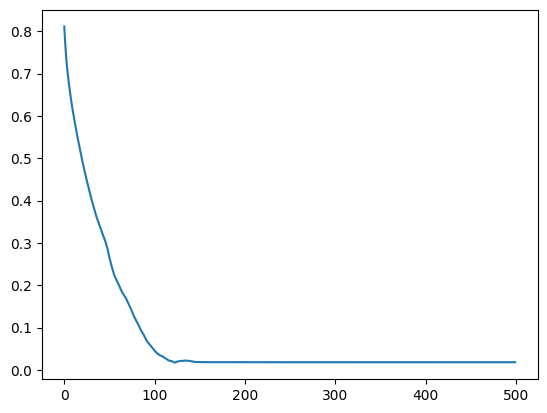

In [191]:
# eigenes Modell wird erstellt
model = MySimpleNN(hidden_size=(70,120,30))
lr=0.0001
# trainiere immer mit 10 Datensätzen auf einmal
batch_size=200

# loss function
# Mean Squared Error
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = torch.nn.MSELoss()
optemizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optemizer, mode='min', factor=0.1, patience=10, verbose=True, threshold=0.0001)

def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    optemizer.step()
    return loss.item()

losses=[]
for epoch in range(500):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    losses.append(loss_sum/len(x_train))
    scheduler.step(losses[-1])
#plot
import matplotlib.pyplot as plt
plt.plot(losses)

# Auswertung

In [192]:
#calculate mean error
error_list=[]
for xb, yb in get_batch(x_test, y_test, batch_size):
    y_hat=model(xb)
    for i in range(len(yb)):
        error_list.append(yb[i]-y_hat[i])

print("mean error:" , sum(error_list)/len(error_list))

print("mean absolute error:" , sum([abs(element) for element in error_list])/len(error_list))

mean error: tensor([-0.7162], grad_fn=<DivBackward0>)
mean absolute error: tensor([1.2436], grad_fn=<DivBackward0>)


In [193]:
y_hat=model(x_test[:10])
y = y_test[:10]
print("y_hat: ", y_hat, "y: ", y)

y_hat:  tensor([[13.1800],
        [12.2174],
        [10.5152],
        [12.5623],
        [11.7231],
        [12.5372],
        [13.9565],
        [12.1787],
        [14.1924],
        [14.4658]], grad_fn=<ReluBackward0>) y:  tensor([12.1960, 13.1224, 12.9598, 11.9184, 13.1712, 11.9829, 13.0170, 13.2534,
        12.0436, 11.8130])
